In [1]:
%matplotlib inline
%run util_draw.py
from rootpy.io import root_open
from ROOT import gROOT

In [2]:
hs_e1f_r_sim, hs_e1f_t_sim, hs_e1f_exp = [], [], []
hns = ['h_p_e', 'h_cz_e', 'h_phi_e',
       'h_p_p', 'h_cz_p', 'h_phi_p',
       'h_p_pip', 'h_cz_pip', 'h_phi_pip']
with root_open('../e1f6/test/hs_e16_225_325.root') as fin:
    for hn in hns:
        h = fin[hn]
        h.SetDirectory(0)
        hs_e1f_r_sim.append(asrootpy(h))
        h = fin['%s_t'%hn]
        h.SetDirectory(0)
        hs_e1f_t_sim.append(asrootpy(h))
with root_open('../e1f6/test/hs_e16_225_325_exp.root') as fin:
    for hn in hns:
        h = fin[hn]
        h.SetDirectory(0)
        hs_e1f_exp.append(asrootpy(h))

In [3]:
for ih, (hr, ht, he) in enumerate(zip(hs_e1f_r_sim, hs_e1f_t_sim, hs_e1f_exp)):
    hr.Scale(1/hr.Integral())
    xc = hr.GetMaximumBin()
    ht.Scale(hr.GetBinContent(xc)/ht.GetBinContent(xc))
#     ht.Scale(1/ht.Integral())
    he.Scale(1/he.Integral())
#     if ih in [2,5,8]:

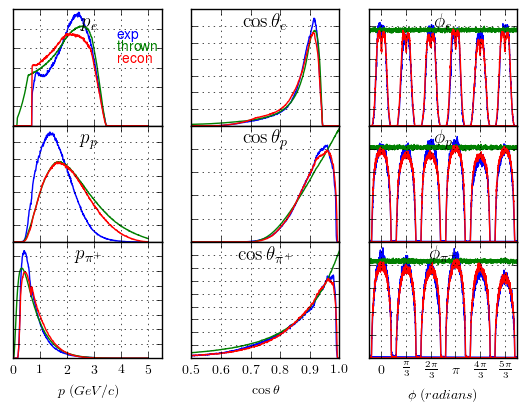

In [4]:
PI = 3.141592653589793
hlabels = [r'$p_e$', r'$\cos{\theta_e}$', r'$\phi_e$',
           r'$p_p$', r'$\cos{\theta_p}$', r'$\phi_p$',
           r'$p_{\pi^+}$', r'$\cos{\theta_{\pi^+}}$', r'$\phi_{\pi^+}$',]
fig, axes2d = plt.subplots(3,3, 'col', False, gridspec_kw={'hspace':0}, figsize=(6.5,4.5))
axes = fig.get_axes()
for ih, (hr, ht, he) in enumerate(zip(hs_e1f_r_sim, hs_e1f_t_sim, hs_e1f_exp)):
    ax = axes[ih]
#     ax.set_yticks([])
    ax.set_yticklabels([])
    ax.grid()
    for h in [he, ht, hr]:
        if ih in [1,4,7]:
            ax.plot(list(h.x()), list(h.y()))
            ax.set_xlim(0.5,1)
            if ih > 5:
                ax.set_xlabel(r'$\cos{\theta}$')
        elif ih in [2,5,8]:
            X = [x+2*PI*(x<-PI/6) for x in hr.x()]
            ax.plot(list(X), list(h.y()))
            ax.set_xlim(-PI/6, 11*PI/6)
            ax.set_xticks([isect*PI/3 for isect in range(0,6)])
            ax.set_xticklabels([r'$0$', r'$\frac{\pi}{3}$', r'$\frac{2\pi}{3}$', r'$\pi$', r'$\frac{4\pi}{3}$', r'$\frac{5\pi}{3}$'])
            if ih > 5:
                ax.set_xlabel(r'$\phi$ $(radians)$')
        else:
            ax.plot(list(h.x()), list(h.y()))
            ax.set_xlim(0.0,5.5)
            if ih > 5:
                ax.set_xlabel(r'$p$ $(GeV/c)$')
    ax.text(0.5, 0.825, hlabels[ih], horizontalalignment='center', fontsize=14,
            transform=ax.transAxes)
    if ih==0:
        ax.text(0.7, 0.75, 'exp', color='blue', transform=ax.transAxes)
        ax.text(0.7, 0.65, 'thrown', color='green', transform=ax.transAxes)
        ax.text(0.7, 0.55, 'recon', color='red', transform=ax.transAxes)

plt.savefig('sim_exp_compare_e16.pdf', bbox_inches='tight')

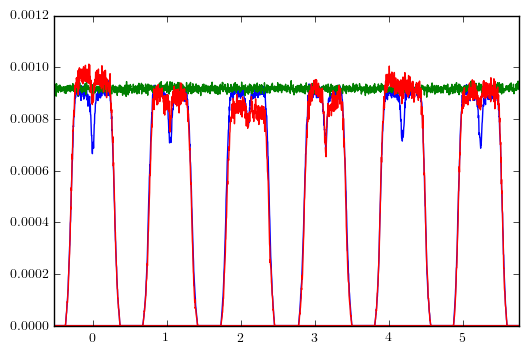

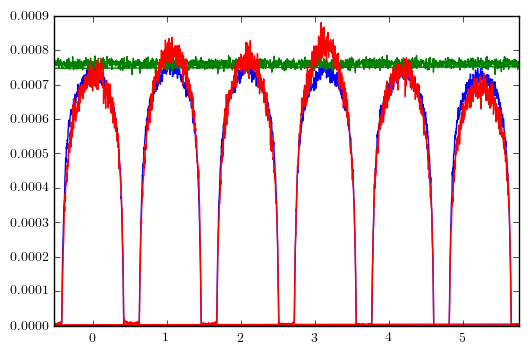

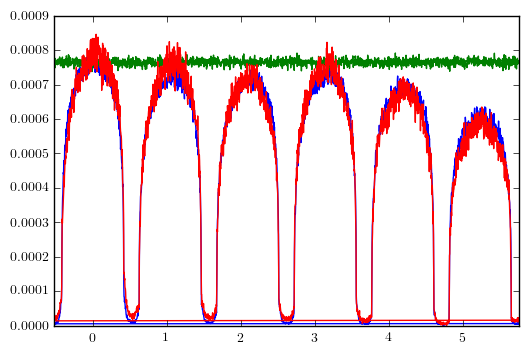

In [4]:
PI = 3.141592653589793
for ih, (hr, ht, he) in enumerate(zip(hs_e1f_r_sim, hs_e1f_t_sim, hs_e1f_exp)):
    if ih in [2,5,8]:
        for h in [hr, ht, he]:
            X = [x+2*PI*(x<-PI/6) for x in hr.x()]
            plt.plot(list(X), list(h.y()))
            plt.xlim(-PI/6, 11*PI/6)
        plt.show()

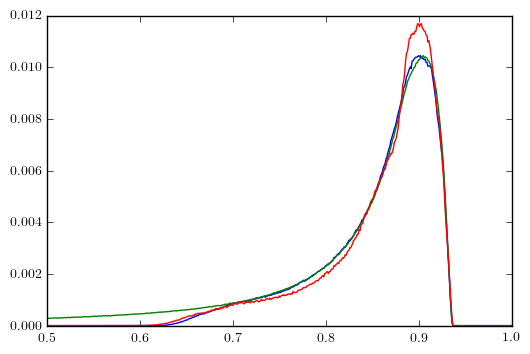

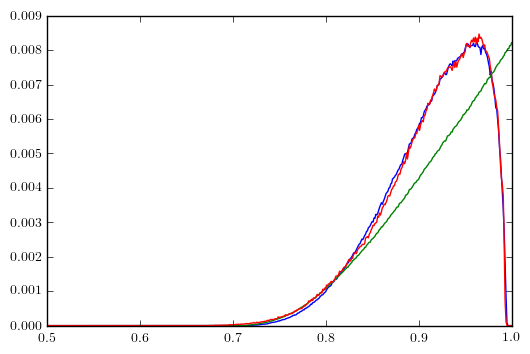

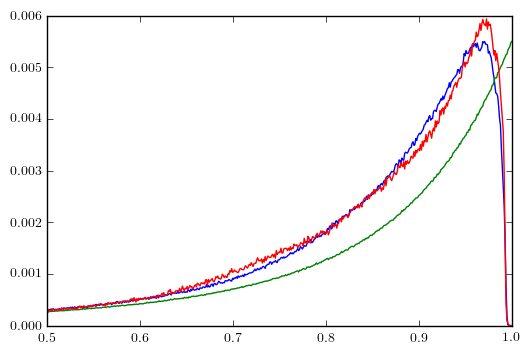

In [5]:
for ih, (hr, ht, he) in enumerate(zip(hs_e1f_r_sim, hs_e1f_t_sim, hs_e1f_exp)):
    if ih in [1,4,7]:
        for h in [hr, ht, he]:
            plt.plot(list(h.x()), list(h.y()))
            plt.xlim(0.5,1)
        plt.show()

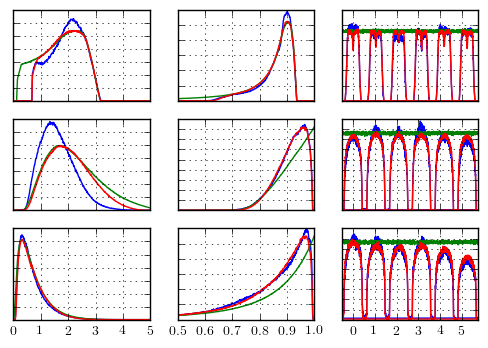

In [3]:
# hs_e1f_exp = []
# with root_open('../e1f6/test/e16_skim_small.root') as fin:
#     h10 = fin['h10_eid_efid_nphe_hfid_mmp/h10']
#     h10.SetAlias("Q2", "(2*5.754*p[0]*(1-cz[0]))")
#     h10.SetAlias("W", "(sqrt(0.938*0.938+2*0.938*(5.754-p[0])-Q2))")
#     h10.SetAlias("ephi", "(1.0*atan2(cy[0],cx[0]))")
#     h10.SetAlias("nu", "((W*W-0.938*0.938+Q2)/(2*0.938))")
#     h10.SetAlias("eps", "(1.0/(1+2*(Q2+nu*nu)/(4*5.754*p[0]-Q2))z)")
#     h10.SetAlias("vgflux", "(0.0073*W*(W*W-0.938*0.938)/(4*3.14159*5.754*5.754*0.938*0.938*Q2*(1-eps)))")
#     h10.SetAlias("mmp0", "(nu+0.938-sqrt(0.938*0.938+p[1]*p[1]))")
#     h10.SetAlias("mmp1", "(-p[0]*cx[0]-p[1]*cx[1])")
#     h10.SetAlias("mmp2", "(-p[0]*cy[0]-p[1]*cy[1])")
#     h10.SetAlias("mmp3", "(5.754-p[0]*cz[0]-p[1]*cz[1])")
#     h10.SetAlias("mmppip0", "(mmp0-sqrt(p[2]^2+0.139^2))")
#     h10.SetAlias("mmppip1", "(mmp1-p[2]*cx[2])")
#     h10.SetAlias("mmppip2", "(mmp2-p[2]*cy[2])")
#     h10.SetAlias("mmppip3", "(mmp3-p[2]*cz[2])")
#     h10.SetAlias("mmp", "sqrt(mmp0^2-mmp1^2-mmp2^2-mmp3^2)")
#     h10.SetAlias("mmppip", "sqrt(mmppip0^2-mmppip1^2-mmppip2^2-mmppip3^2)")
#     h = h10.Draw("p[0]>>h_p_e(500, 0, 5)", "Q2>=2.25 && Q2<3.25 && id[0]==11 && W>1.72 && W<2.8 && mmppip>0.28", "goff")
#     h.Scale(1/h.Integral())
#     h.SetDirectory(0)
#     hs_e1f_exp.append(asrootpy(h))
#     h = h10.Draw("p[1]>>h_p_p(500, 0, 5)", "Q2>=2.25 && Q2<3.25 && id[1]==2212 && W>1.72 && W<2.8 && mmppip>0.28")
#     h.Scale(1/h.Integral())
#     h.SetDirectory(0)
#     hs_e1f_exp.append(asrootpy(h))
#     h = h10.Draw("p[2]>>h_p_pip(500, 0, 5)", "Q2>=2.25 && Q2<3.25 && id[2]==211 && W>1.72 && W<2.8 && mmppip>0.28")
#     h.Scale(1/h.Integral())
#     h.SetDirectory(0)
#     hs_e1f_exp.append(asrootpy(h))
#     h = h10.Draw("cz[0]>>h_cz_e(2000, -1, 1)", "Q2>=2.25 && Q2<3.25 && id[0]==11 && W>1.72 && W<2.8 && mmppip>0.28")
#     h.Scale(1/h.Integral())
#     h.SetDirectory(0)
#     hs_e1f_exp.append(asrootpy(h))
#     h = h10.Draw("cz[1]>>h_cz_p(2000, -1, 1)", "Q2>=2.25 && Q2<3.25 && id[1]==2212 && W>1.72 && W<2.8 && mmppip>0.28")
#     h.Scale(1/h.Integral())
#     h.SetDirectory(0)
#     hs_e1f_exp.append(asrootpy(h))
#     h = h10.Draw("cz[2]>>h_cz_pip(2000, -1, 1)", "Q2>=2.25 && Q2<3.25 && id[2]==211 && W>1.72 && W<2.8 && mmppip>0.28")
#     h.Scale(1/h.Integral())
#     h.SetDirectory(0)
#     hs_e1f_exp.append(asrootpy(h))
#     h = h10.Draw("atan2(cy[0], cx[0])>>h_phi_e(2000, -3.141592653589793, 3.141592653589793)", "Q2>=2.25 && Q2<3.25 && id[0]==11 && W>1.72 && W<2.8 && mmppip>0.28")
#     h.Scale(1/h.Integral())
#     h.SetDirectory(0)
#     hs_e1f_exp.append(asrootpy(h))
#     h = h10.Draw("atan2(cy[1], cx[1])>>h_phi_p(2000, -3.141592653589793, 3.141592653589793)", "Q2>=2.25 && Q2<3.25 && id[1]==2212 && W>1.72 && W<2.8 && mmppip>0.28")
#     h.Scale(1/h.Integral())
#     h.SetDirectory(0)
#     hs_e1f_exp.append(asrootpy(h))
#     h = h10.Draw("atan2(cy[2], cx[2])>>h_phi_pip(2000, -3.141592653589793, 3.141592653589793)", "Q2>=2.25 && Q2<3.25 && id[2]==211 && W>1.72 && W<2.8 && mmppip>0.28")
#     h.Scale(1/h.Integral())
#     h.SetDirectory(0)
#     hs_e1f_exp.append(asrootpy(h))

# with root_open('../e1f6/test/hs_e16_225_325_exp.root', 'w') as fout:
#     for h in hs_e1f_exp:
#         h.SetDirectory(fout.GetDirectory('.'))
#     fout.Write()

In [155]:
hs_e1f_exp = []
with root_open('../e1f6/test/e1f_skim_small2.root') as fin:
#     h10 = fin['h10_eid_efid_nphe_hfid_mmp/h10']
    h10 = fin['h10_eid_efid_nphe_hfid_pcor_badsc_mmp/h10']
    h10.SetAlias("Q2", "(2*5.499*p[0]*(1-cz[0]))")
    h10.SetAlias("W", "(sqrt(0.938*0.938+2*0.938*(5.499-p[0])-Q2))")
    h10.SetAlias("ephi", "(1.0*atan2(cy[0],cx[0]))")
    h10.SetAlias("nu", "((W*W-0.938*0.938+Q2)/(2*0.938))")
    h10.SetAlias("eps", "(1.0/(1+2*(Q2+nu*nu)/(4*5.499*p[0]-Q2))z)")
    h10.SetAlias("vgflux", "(0.0073*W*(W*W-0.938*0.938)/(4*3.14159*5.499*5.499*0.938*0.938*Q2*(1-eps)))")
    h10.SetAlias("mmp0", "(nu+0.938-sqrt(0.938*0.938+p[1]*p[1]))")
    h10.SetAlias("mmp1", "(-p[0]*cx[0]-p[1]*cx[1])")
    h10.SetAlias("mmp2", "(-p[0]*cy[0]-p[1]*cy[1])")
    h10.SetAlias("mmp3", "(5.499-p[0]*cz[0]-p[1]*cz[1])")
    h10.SetAlias("mmppip0", "(mmp0-sqrt(p[2]^2+0.139^2))")
    h10.SetAlias("mmppip1", "(mmp1-p[2]*cx[2])")
    h10.SetAlias("mmppip2", "(mmp2-p[2]*cy[2])")
    h10.SetAlias("mmppip3", "(mmp3-p[2]*cz[2])")
    h10.SetAlias("mmp", "sqrt(mmp0^2-mmp1^2-mmp2^2-mmp3^2)")
    h10.SetAlias("mmppip", "sqrt(mmppip0^2-mmppip1^2-mmppip2^2-mmppip3^2)")
    h = h10.Draw("mmp>>h_mmp(175, 0.6, 0.95)", "Q2>=2.25 && Q2<3.25 && id[0]==11 && id[1]==2212 && id[2]==211 && W>1.72 && W<2 && mmppip>0.28", "goff")
    h.Scale(1/h.Integral())
    h.SetDirectory(0)
    hs_e1f_exp.append(asrootpy(h))

with root_open('../e1f6/test/hs_e1f_225_325_exp_mmp.root', 'w') as fout:
    for h in hs_e1f_exp:
        h.SetDirectory(fout.GetDirectory(''))
    fout.Write()

In [97]:
hmmps = []
fns = ['../e1f6/test/hs_e16_225_325_hmmp.root', '../e1f6/test/hs_e16_225_325_exp_mmp.root']
# fns = ['../e1f6/test/hs_e1f_225_325_hmmp.root', '../e1f6/test/hs_e1f_225_325_exp_mmp.root']
for fn in fns:
    with root_open(fn, 'r') as fin:
        h = fin['h_mmp']
        h.SetDirectory(0)
        h.Scale(1/h.Integral())
        hmmps.append(asrootpy(h))

for h in hmmps:
    plt.plot(list(h.x()), list(h.y()))

hmmp_e = hmmps[1].Clone('hmmp_e2')

print(hmmp_e.find_bin(0.65), hmmp_e.find_bin(0.725), hmmp_e.find_bin(0.9), hmmp_e.find_bin(0.95))

for ib in range(63,150):
    hmmp_e.SetBinContent(ib, 0)
    hmmp_e.SetBinError(ib, 0)
for ib in range(0,26):
    hmmp_e.SetBinContent(ib, 0)
    hmmp_e.SetBinError(ib, 0)

f = R.TF1('f2', 'pol2', 0.6, 0.95)
hmmp_e.Fit(f)

hmmp_e = hmmps[1].Clone('hmmp_e')

hmmp_e.Add(f, -1)

for h in hmmps+[hmmp_e]:
    plt.plot(list(h.x()), list(h.y()))

# scale = hmmps[0].GetMaximum()/hmmp_e.GetMaximum()
scale = hmmps[0].Integral(27,175)/hmmp_e.Integral(27,175)
hmmps[1].Scale(scale)
hmmp_e.Scale(scale)

print(len(list(hmmps[0].x())), len(list(hmmp_e.x())))
print(hmmps[0].Integral(27,176),hmmp_e.Integral(27,176))
print(hmmps[0].GetBinCenter(27), hmmp_e.GetBinCenter(27))
print(hmmps[0].GetBinCenter(176), hmmp_e.GetBinCenter(176))

fig = plt.figure(figsize=goldenaspect(6.5))
fig.add_axes((0,0,1,1))
ax = fig.get_axes()[0]
for h in hmmps+[hmmp_e]:
    ax.plot(list(h.x()), list(h.y()))
ax.grid()
ax.set_yticklabels([])
ax.set_xlim([0.6,0.95])

In [161]:
def get_mmps(exp='e16', offset=0):
    hmmps = []
    fns = ['../e1f6/test/hs_e16_225_325_hmmp.root', '../e1f6/test/hs_e16_225_325_exp_mmp.root']
    if exp=='e1f':
        offset=2
        fns = ['../e1f6/test/hs_e1f_225_325_hmmp.root', '../e1f6/test/hs_e1f_225_325_exp_mmp.root']
    for fn in fns:
        with root_open(fn, 'r') as fin:
            h = fin['h_mmp']
            h.SetDirectory(0)
            h.Scale(1/h.Integral())
            hmmps.append(asrootpy(h))

#     for h in hmmps:
#         plt.plot(list(h.x()), list(h.y()))

    hmmp_e = hmmps[1].Clone('hmmp_e2')

#     print(hmmp_e.find_bin(0.65), hmmp_e.find_bin(0.725), hmmp_e.find_bin(0.9), hmmp_e.find_bin(0.95))

    for ib in range(63,150):
        hmmp_e.SetBinContent(ib, 0)
        hmmp_e.SetBinError(ib, 0)
    for ib in range(0,26):
        hmmp_e.SetBinContent(ib, 0)
        hmmp_e.SetBinError(ib, 0)

    f = R.TF1('f2', 'pol2', 0.6, 0.95)
    hmmp_e.Fit(f)

    hmmp_e = hmmps[1].Clone('hmmp_e')

    hmmp_e.Add(f, -1)

#     for h in hmmps+[hmmp_e]:
#         plt.plot(list(h.x()), list(h.y()))

    sigbounds = (hmmps[0].FindBin(0.75), hmmps[0].FindBin(0.85))
    totbounds = (hmmps[0].FindBin(0.65)-offset,hmmps[0].GetNbinsX()-offset)
    # scale = hmmps[0].GetMaximum()/hmmp_e.GetMaximum()
#     scale = hmmps[0].Integral(27,175)/hmmp_e.Integral(27,175)
    scale = hmmps[0].Integral(*totbounds)/hmmp_e.Integral(*totbounds)
    hmmps[1].Scale(scale)
    hmmp_e.Scale(scale)

    expcorr = hmmp_e.Integral(*totbounds)/hmmp_e.Integral(*sigbounds)
    simcorr = hmmps[0].Integral(*totbounds)/hmmps[0].Integral(*sigbounds)
    print(simcorr,expcorr,expcorr/simcorr)
#     print(len(list(hmmps[0].x())), len(list(hmmp_e.x())))
#     print(hmmps[0].Integral(27,176),hmmp_e.Integral(27,176))
#     print(hmmps[0].GetBinCenter(27), hmmp_e.GetBinCenter(27))
#     print(hmmps[0].GetBinCenter(176), hmmp_e.GetBinCenter(176))

#     fig = plt.figure(figsize=goldenaspect(6.5))
#     fig.add_axes((0,0,1,1))
#     ax = fig.get_axes()[0]
#     for h in hmmps+[hmmp_e]:
#         ax.plot(list(h.x()), list(h.y()))
#     ax.grid()
#     ax.set_yticklabels([])
#     ax.set_xlim([0.6,0.95])
    return hmmps+[hmmp_e]

1.0986575096567484 1.0665802733788432 0.9708032430525806
1.0931991140269957 1.0924884520683946 0.9993499245018749


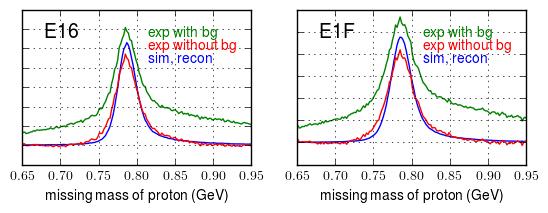

In [162]:
hs_6 = get_mmps()
hs_f = get_mmps('e1f')

fig, axes = plt.subplots(1,2, figsize=(6.5,2))
for ihs, (exp, hs, ax) in enumerate(zip(['E16','E1F'],[hs_6,hs_f], axes)):
    for ih,h in enumerate(hs):
#         offset = 0
        offset = 0.004 if ih>0 and ihs==1 else 0
        X = list([x+offset for x in h.x()])
        ax.plot(X, list(h.y()))
    ax.grid()
    ax.set_yticklabels([])
    ax.set_xlim([0.65,0.95])
    ax.set_xlabel(r'missing mass of proton (GeV)')
    ax.text(0.1, 0.85, exp,
            fontsize=14, fontweight='bold',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.text(0.55, 0.85, 'exp with bg', color='green',
            fontsize=10, fontweight='bold',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.text(0.55, 0.765, 'exp without bg', color='red',
            fontsize=10, fontweight='bold',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)
    ax.text(0.55, 0.68, 'sim, recon', color='blue',
            fontsize=10, fontweight='bold',
            horizontalalignment='left',
            verticalalignment='center',
            transform=ax.transAxes)

fig.savefig('sim_exp_compare_mmp.pdf', bbox_inches='tight')
# fig = plt.figure(figsize=goldenaspect(6.5))
# fig.add_axes((0,0,1,1))
# ax = fig.get_axes()[0]
# for h in hs_6:
#     ax.plot(list(h.x()), list(h.y()))
# ax.grid()
# ax.set_yticklabels([])
# ax.set_xlim([0.65,0.95])

# fig = plt.figure(figsize=goldenaspect(6.5))
# fig.add_axes((0,0,1,1))
# ax = fig.get_axes()[0]
# for ih, h in enumerate(hs_f):
#     offset = 0.0035 if ih==0 else 0
#     X = list([x-offset for x in h.x()])
#     ax.plot(X, list(h.y()))
# ax.grid()
# ax.set_yticklabels([])
# ax.set_xlim([0.65,0.95])

In [231]:
def get_phis(exp='e16', W0=1.72, W1=1.82):
    h6s = [h6r, h6e] = [None, None]
    if exp=='e1f':
        with root_open('../e1f6/test/e1f_sim_skim_top1_275_375_ho.root','r') as fin:
            h6r = fin['h6_eid_efid_nphe_hfid_pcor_badsc_mmp/hbd_yield']
        with root_open('../e1f6/test/e1f_skim_small_h6_t0_nphe.root','r') as fin:
            h6e = fin['h6_eid_efid_nphe_hfid_pcor_badsc_mmp/hbd_yield']
    else:
        with root_open('../e1f6/test/e16_sim_skim_top1_275_375_ho_b.root','r') as fin:
            h6r = fin['h6_eid_efid_nphe_hfid_pcor_badsc_mmp/hbd_yield']
        with root_open('../e1f6/test/e16_skim_small_h6_t0_nphe.root','r') as fin:
            h6e = fin['h6_eid_efid_nphe_hfid_pcor_badsc_mmp/hbd_yield']
        
    bW0 = h6r.GetAxis(0).FindBin(W0)
    bW1 = h6r.GetAxis(0).FindBin(W1)
    h6r.GetAxis(0).SetRange(bW0,bW1)
    h6e.GetAxis(0).SetRange(bW0,bW1)
    bMMp0 = h6e.GetAxis(5).FindBin(0.76)
    bMMp1 = h6e.GetAxis(5).FindBin(0.81)
    h6e.GetAxis(5).SetRange(bMMp0,bMMp1)
    h6r.GetAxis(5).SetRange(bMMp0,bMMp1)
    bQ20 = h6e.GetAxis(1).FindBin(2.9)
    bQ21 = h6e.GetAxis(1).FindBin(3.1)
    h6e.GetAxis(1).SetRange(bQ20,bQ21)
    h6r.GetAxis(1).SetRange(bQ20,bQ21)
    hphir = asrootpy(h6r.Projection(4))
    hphir.SetName('hphir')
    hphie = asrootpy(h6e.Projection(4))
    hphie.SetName('hphie')

    hphie.Scale(1/hphie.Integral())
    hphir.Scale(1/hphir.Integral())
    hphie.SetDirectory(0)
    hphir.SetDirectory(0)
    
    return [hphir, hphie]

In [256]:
import math

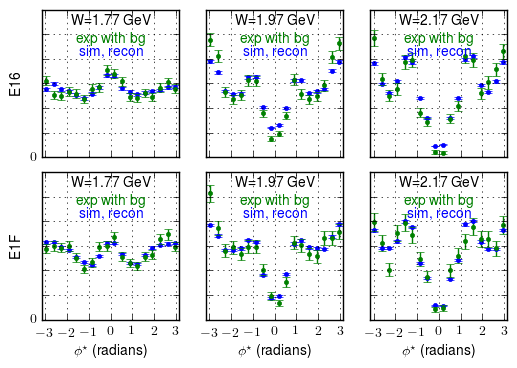

In [279]:
Wrs = [(1.75, 1.79), (1.95, 1.99), (2.15, 2.19)]
fig, _ = plt.subplots(2,3, 'col', 'row', gridspec_kw={'hspace':0.1})
axes = fig.get_axes()
iax = 0
for exp in ['e16', 'e1f']:
    for Wr in Wrs:
        hphir, hphie = get_phis(exp, *Wr)
        phi = list(hphie.x())
        hphie.set_marker_color('b')
        hphie.set_marker_style('.')
        hphir.set_marker_color('r')
        hphir.set_marker_style('.')
        ax = axes[iax]
        ax.set_yticklabels([r'$0$'])
        if iax%3==0:
            ax.set_ylabel(exp.upper())
        if iax>2:
            ax.set_xlabel(r'$\phi^\star$ (radians)')
#         ax.set_xticklabels([])
        X, Y, Yerr = list(hphir.x()), list(hphir.y()), list(hphir.yerrh())
        ax.errorbar(X, Y, Yerr, fmt='b.', ecolor='b')
        X, Y, Yerr = list(hphie.x()), list(hphie.y()), list(hphie.yerrh())
        ax.errorbar(X, Y, Yerr, fmt='g.', ecolor='g')
        ax.set_ylim(0,0.12)
        ax.set_xlim(-math.pi, math.pi)
        ax.grid()
#         ax.text(0.5, 0.85, exp.upper(), fontsize=14,
#                 horizontalalignment='center', transform=ax.transAxes)
        ax.text(0.5, 0.9, 'W=%.2f GeV'%(sum(Wr)/2),
                horizontalalignment='center', transform=ax.transAxes)
        if True: #iax==0:
            ax.text(0.5, 0.8, 'exp with bg', color='green',
                    fontsize=10, fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ax.transAxes)
            ax.text(0.5, 0.715, 'sim, recon', color='blue',
                    fontsize=10, fontweight='bold',
                    horizontalalignment='center',
                    verticalalignment='center',
                    transform=ax.transAxes)
        iax += 1
fig.savefig('sim_exp_compare_phi.pdf', bbox_inches='tight')

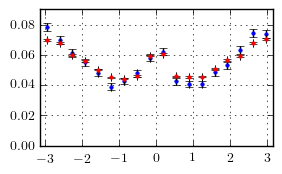

In [238]:
hphir, hphie = get_phis('e1f', 1.75, 1.89)
phi = list(hphie.x())
# plt.plot(phi, list(hphie.y()))
# plt.plot(phi, list(hphir.y()))
hphie.set_marker_color('b')
hphie.set_marker_style('.')
hphir.set_marker_color('r')
hphir.set_marker_style('.')
fig = draw(hphie)
draw(hphir, fig=fig)
plt.grid()
# plt.ylim(0.03)
plt.show()

In [145]:
fgaus = R.TF1('fgaus', 'gaus', 0.6, 0.95)
fgaus.SetParameter(0, 1)
fgaus.SetParameter(1, 0.782)
fgaus.SetParameter(2, 0.01)
hgaus = R.TH1D('hgaus', 'hgaus', 175, 0.6, 0.95)
hgaus.FillRandom('fgaus', 500000)
hgaus = asrootpy(hgaus)
hgaus.Scale(1/hgaus.Integral())
# 0.35/hmmp_e.get_nbins_x()

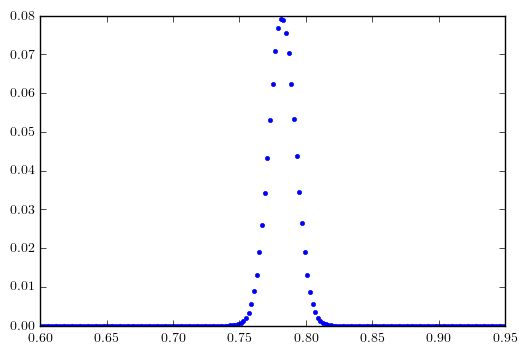

In [146]:
plt.plot(list(hgaus.x()), list(hgaus.y()), '.')
# print([(x,y) for (x,y) in zip(hgaus.x(),hgaus.y()) if y>0])

In [147]:
Y = np.convolve(list(hmmps[0].y()), list(hgaus.y()), 'same')

(175, 175, 175)


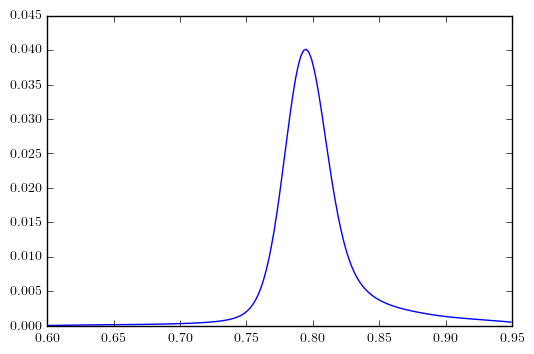

In [148]:
plt.plot(list(hgaus.x()), Y)
print((len(Y), len(list(hmmps[0].x())), len(list(hgaus.x()))))

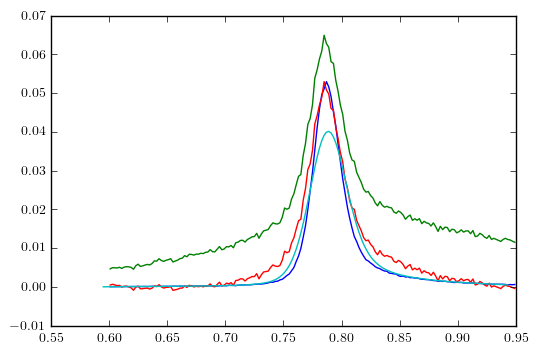

In [150]:
for h in hmmps + [hmmp_e]:
    plt.plot(list(h.x()), list(h.y()))
plt.plot(list([x-0.006 for x in hgaus.x()]), Y)

In [65]:
hmmp_diff = hmmp_e.Clone('hmmp_diff')

In [66]:
hmmp_diff.Add(hmmps[0], -1)

True

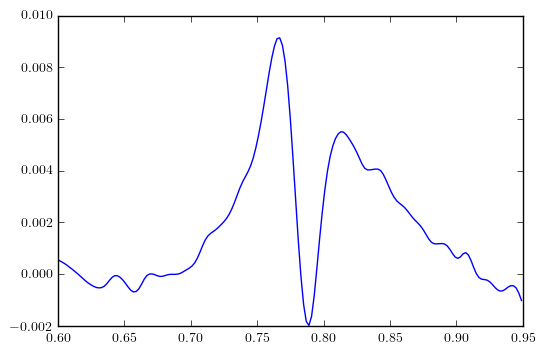

In [77]:
plt.plot(list(hmmp_diff.x()), list(hmmp_diff.y()))

In [76]:
hmmp_diff.Smooth(10)

In [78]:
hmmp_r = hmmps[0].Clone('hmmp_r')
hmmp_r.Add(hmmp_diff)

True

In [ ]:
hmmp

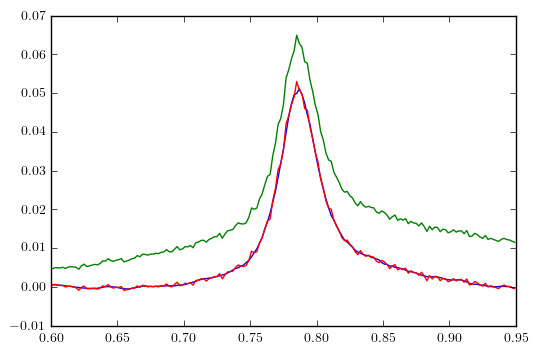

In [79]:
for h in [hmmp_r, hmmps[1], hmmp_e]:
    plt.plot(list(h.x()), list(h.y()))